# Data Cleaning and Preparation

**Authors:**
- Ivana Jasna Caltagirone         - ivca22ab@student.cbs.dk
- Tommaso Ghisini                 - togh22ab@student.cbs.dk
- Frederik Markus Rytoft Gøtske   - frgo18ab@student.cbs.dk
- Arianna Sammarchi               - arsa22ad@student.cbs.dk

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import re

In [2]:
import yahooquery as yq

##  Google Colaboratory
To run in google colab, make sure to specify the right path to the dataset

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Visual Analytics - Final Project/data/IWA-Environmental-Dataset-Final-Sample-External.xlsx', sheet_name=1)

In [5]:
# yahooquery not installed by default on colab, can be installed running the following command:
# !pip install yahooquery

## Data Loading and Exploration

In [6]:
df = pd.read_excel('../data/IWA-Environmental-Dataset-Final-Sample-External.xlsx', sheet_name=1)
df.head(3)

,Year,Company Name,Country,GICS Sub-Industry,Industry (Exiobase),Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,Working Capacity,Fish Production Capacity,...,SDG 6,SDG 12.2,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed
0,2019,SAGA PLC,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,Multi-line Insurance,Activities auxiliary to financial intermediati...,-0.028872,-0.130254,-3.184231e+07,-3.115075e+07,-7184.203318,...,-170775.886453,-1059.042606,-4.739468,-1.027193,-3584.970569,-5.649112,70.667599,70.667599,-1297.277948,0.006135
1,2019,BURSA MALAYSIA BHD,MALAYSIA,Financial Exchanges & Data,Activities auxiliary to financial intermediati...,-0.016772,-0.034656,-1.968379e+06,-1.924910e+06,-451.342112,...,-11502.243880,-168.146428,-1.410813,-1.207108,-222.196310,-1.681590,10.138780,10.138780,-79.398691,0.043215
2,2019,INTERTEK GROUP PLC,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,Research & Consulting Services,Activities auxiliary to financial intermediati...,-0.015297,-0.094878,-6.059927e+07,-5.928166e+07,-13774.014902,...,-324959.759255,-3804.051175,-17.024036,-3.689647,-6861.392776,-20.291452,253.836024,253.836024,-2470.054721,0.011467


In [7]:
df.shape

(14035, 34)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14035 entries, 0 to 14034
Data columns (total 34 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Year                                                           14035 non-null  int64  
 1   Company Name                                                   14035 non-null  object 
 2   Country                                                        14014 non-null  object 
 3   GICS Sub-Industry                                              14035 non-null  object 
 4   Industry (Exiobase)                                            14035 non-null  object 
 5   Environmental Intensity (Sales)                                14035 non-null  float64
 6   Environmental Intensity (Op Inc)                               13273 non-null  float64
 7   Total Environmental Cost                                  

In [9]:
columns_to_drop = ['GICS Sub-Industry', 'Environmental Intensity (Op Inc)',
                   'SDG 1.5', 'SDG 2.1', 'SDG 2.2', 'SDG 2.3', 'SDG 2.4',
                   'SDG 3.3', 'SDG 3.4', 'SDG 3.9', 'SDG 6', 'SDG 12.2',
                   'SDG 14.1', 'SDG 14.2', 'SDG 14.3', 'SDG 14.c',
                   'SDG 15.1', 'SDG 15.2', 'SDG 15.5', '% Imputed']

df.drop(columns=columns_to_drop, axis=1, inplace=True)

### Treating Missing Values and Duplicates

Checking for missing values

In [10]:
df.isnull().sum()

Year                                                              0
Company Name                                                      0
Country                                                          21
Industry (Exiobase)                                               0
Environmental Intensity (Sales)                                   0
Total Environmental Cost                                          0
Working Capacity                                                  0
Fish Production Capacity                                          0
Crop Production Capacity                                          0
Meat Production Capacity                                          0
Biodiversity                                                      0
Abiotic Resources                                                 0
Water production capacity (Drinking water & Irrigation Water)     0
Wood Production Capacity                                          0
dtype: int64

In [11]:
df.dropna(inplace=True)

### Focusing on Europe

As the dashboard is focused on europe the data that is not relevant is dropped

In [12]:
df.replace('UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND', 'UNITED KINGDOM', inplace=True)

countries = df.Country
df['Country'] = [country.title() for country in countries]

In [13]:
eu = ['Austria', 'Belgium', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Finland', 'France',
      'Germany', 'Gibraltar', 'Greece', 'Hungary', 'Ireland', 'Isle Of Man', 'Italy', 'Jersey',
      'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Slovenia',
      'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom']

In [14]:
df = df.loc[df['Country'].isin(eu)]

Isle of Man, Jersey and Gibraltar are reassigned to United Kingdom their sovereign state

In [15]:
df.loc[df['Country'] == 'Isle Of Man', 'Country'] = 'United Kingdom'
df.loc[df['Country'] == 'Jersey', 'Country'] = 'United Kingdom'
df.loc[df['Country'] == 'Gibraltar', 'Country'] = 'United Kingdom'

In [16]:
df.value_counts('Country')

Country
United Kingdom    1608
France             527
Germany            379
Switzerland        332
Sweden             281
Spain              249
Netherlands        199
Italy              133
Finland            121
Norway             106
Ireland            102
Austria             94
Denmark             71
Belgium             62
Portugal            57
Turkey              51
Greece              36
Poland              35
Luxembourg          30
Hungary             21
Romania             11
Czechia             10
Croatia              9
Malta                5
Cyprus               2
Slovenia             1
dtype: int64

In [17]:
df.shape

(4532, 14)

## Macro Industries
Industries from the Exiobase classification are grouped in macro industries

In [18]:
industry_dict = {
    # Fossil Fuels
    'Extraction of crude petroleum and services related to crude oil extraction, excluding surveying':'Fossil Fuels',
    'Petroleum Refinery':'Fossil Fuels',
    'Extraction of natural gas and services related to natural gas extraction, excluding surveying':'Fossil Fuels',
    'Transport via pipelines':'Fossil Fuels',

    # Finance and Insurance
    'Activities auxiliary to financial intermediation (67)':'Finance & Insurance',
    'Financial intermediation, except insurance and pension funding (65)':'Finance & Insurance',
    'Insurance and pension funding, except compulsory social security (66)':'Finance & Insurance',

    # Real Estate and Construction
    'Real estate activities (70)':'Real Estate & Construction',
    'Construction (45)':'Real Estate & Construction',

    # Transport
    'Air transport (62)':'Transport',
    'Other land transport':'Transport',
    'Sea and coastal water transport':'Transport',
    'Transport via railways':'Transport',

    # Retail and Wholesale trade
    'Retail trade, except of motor vehicles and motorcycles; repair of personal and household goods (52)':'Retail & Wholesale',
    'Wholesale trade and commission trade, except of motor vehicles and motorcycles (51)':'Retail & Wholesale',

    # Tech and Communications
    'Computer and related activities (72)':'Tech & Communications',
    'Post and telecommunications (64)':'Tech & Communications',
    'Manufacture of office machinery and computers (30)':'Tech & Communications',
    'Manufacture of radio, television and communication equipment and apparatus (32)':'Tech & Communications',
    'Manufacture of electrical machinery and apparatus n.e.c. (31)':'Tech & Communications',

    # Food industry
    'Manufacture of beverages':'Food Industry',
    'N-fertiliser':'Food Industry',
    'Processing of Food products nec':'Food Industry',
    'Cultivation of cereal grains nec':'Food Industry',

    # Mining
    'Copper production':'Mining',
    'Mining of chemical and fertilizer minerals, production of salt, other mining and quarrying n.e.c.':'Mining',
    'Mining of other non-ferrous metal ores and concentrates':'Mining',
    'Mining of coal and lignite; extraction of peat (10)':'Mining',
    'Quarrying of sand and clay':'Mining',

    # Health care and life sciences
    'Health and social work (85)':'Healthcare & Life Sciences',
    'Research and development (73)':'Healthcare & Life Sciences',
    'Manufacture of medical, precision and optical instruments, watches and clocks (33)':'Healthcare & Life Sciences',

    # Service and recreational activities
    'Other service activities (93)':'Service',
    'Publishing, printing and reproduction of recorded media (22)':'Service',
    'Education (80)':'Service',
    'Recreational, cultural and sporting activities (92)':'Service',

    # General Manufacturing
    'Manufacture of basic iron and steel and of ferro-alloys and first products thereof':'General Manufacturing',
    'Manufacture of fabricated metal products, except machinery and equipment (28)':'General Manufacturing',
    'Manufacture of rubber and plastic products (25)':'General Manufacturing',
    'Manufacture of tobacco products (16)':'General Manufacturing',
    'Paper':'General Manufacturing',
    'Forestry, logging and related service activities (02)':'General Manufacturing',
    'Manufacture of furniture; manufacturing n.e.c. (36)':'General Manufacturing',

    # Textile and clothing
    'Manufacture of textiles (17)':'Textile',
    'Manufacture of wearing apparel; dressing and dyeing of fur (18)':'Textile',

    # Vehicles and machinery
    'Manufacture of motor vehicles, trailers and semi-trailers (34)':'Vehicles & Machinery',
    'Manufacture of machinery and equipment n.e.c. (29)':'Vehicles & Machinery',
    'Sale, maintenance, repair of motor vehicles, motor vehicles parts, motorcycles, motor cycles parts and accessoiries':'Vehicles & Machinery',
    'Renting of machinery and equipment without operator and of personal and household goods (71)':'Vehicles & Machinery',

    # Electricity and utilities
    'Collection, purification and distribution of water (41)':'Utilities',
    'Production of electricity by hydro':'Utilities',
    'Production of electricity by petroleum and other oil derivatives':'Utilities',
    'Production of electricity by solar photovoltaic':'Utilities',
    'Production of electricity nec':'Utilities',

    # Conglomerates
    'Activities of membership organisation n.e.c. (91)':'Conglomerates',

    # Chemicals
    'Chemicals nec':'Chemicals'
    }

df['Macro Industry'] = df['Industry (Exiobase)']
df = df.replace({'Macro Industry':industry_dict})

Industry names are cleaned

In [19]:
def cleanindustry(industry):
    industry = re.sub('[^a-zA-Z \s , -]', '', industry).replace('nec', '').strip()
    return industry

df['Industry (Exiobase)'] = [cleanindustry(i) for i in df['Industry (Exiobase)']]

In [20]:
df['Industry (Exiobase)'].unique()[:5]

array(['Activities auxiliary to financial intermediation',
       'Activities of membership organisation', 'Air transport',
       'Chemicals', 'Collection, purification and distribution of water'],
      dtype=object)

### Conglomerates reassignment

In [21]:
df[df['Macro Industry'] == 'Conglomerates'].value_counts('Company Name')

Company Name
SIEMENS AG                      10
SMITHS GROUP PLC                10
EURAZEO                          9
RHEINMETALL AG                   5
HACI OMER SABANCI HOLDING AS     4
ENKA INSAAT VE SANAYI AS         3
MYTILINEOS SA                    3
TURK SISE CAM                    3
WENDEL                           2
AKER ASA                         1
CORP FINANCIERA ALBA             1
dtype: int64

In [22]:
df.loc[df['Company Name'] == 'SIEMENS AG', 'Macro Industry'] = 'General Manufacturing'              # Manufacturing conglomerate
df.loc[df['Company Name'] == 'SMITHS GROUP PLC', 'Macro Industry'] = 'Service'                      # Mechanical Engineering
df.loc[df['Company Name'] == 'EURAZEO', 'Macro Industry'] = 'Finance & Insurance'                 # Investment Company
df.loc[df['Company Name'] == 'RHEINMETALL AG', 'Macro Industry'] = 'Vehicles & Machinery'         # Automotive and arms
df.loc[df['Company Name'] == 'HACI OMER SABANCI HOLDING AS', 'Macro Industry'] = 'Finance & Insurance'  # Financial services, energy, cement, retail
df.loc[df['Company Name'] == 'ENKA INSAAT VE SANAYI AS', 'Macro Industry'] = 'Service'              # Engineering Services
df.loc[df['Company Name'] == 'MYTILINEOS SA', 'Macro Industry'] = 'General Manufacturing'           # Metallurgy
df.loc[df['Company Name'] == 'TURK SISE CAM', 'Macro Industry'] = 'General Manufacturing'           # Glass Manufacturer
df.loc[df['Company Name'] == 'WENDEL', 'Macro Industry'] = 'Finance & Insurance'                  # Investment Company
df.loc[df['Company Name'] == 'AKER ASA', 'Macro Industry'] = 'Finance & Insurance'                # Investment Company
df.loc[df['Company Name'] == 'CORP FINANCIERA ALBA', 'Macro Industry'] = 'Finance & Insurance'    # Investment Company

In [23]:
df['Macro Industry'].value_counts()

Finance & Insurance           781
Real Estate & Construction    593
Tech & Communications         555
Service                       405
Vehicles & Machinery          299
General Manufacturing         273
Food Industry                 259
Retail & Wholesale            242
Fossil Fuels                  223
Healthcare & Life Sciences    221
Mining                        189
Utilities                     175
Transport                     146
Chemicals                     145
Textile                        26
Name: Macro Industry, dtype: int64

## Revenues

Revenues are computed evaluating the ratio between 'Total Environmental Cost' and ' Enviromental Intensity (Sales)'

In [24]:
df['Revenue'] = df['Total Environmental Cost'] / df['Environmental Intensity (Sales)']

In [25]:
df['Rev_Abiotic'] = df['Abiotic Resources'] / df['Revenue']
df['Rev_Biodiversity'] = df['Biodiversity'] / df['Revenue']
df['Rev_Crop'] = df['Crop Production Capacity'] / df['Revenue']
df['Rev_Fish'] = df['Fish Production Capacity'] / df['Revenue']
df['Rev_Meat'] = df['Meat Production Capacity'] / df['Revenue']
df['Rev_Water'] = df['Water production capacity (Drinking water & Irrigation Water)'] / df['Revenue']
df['Rev_Wood'] = df['Wood Production Capacity'] / df['Revenue']
df['Rev_Work'] = df['Working Capacity'] / df['Revenue']

In [26]:
df.columns

Index(['Year', 'Company Name', 'Country', 'Industry (Exiobase)',
       'Environmental Intensity (Sales)', 'Total Environmental Cost',
       'Working Capacity', 'Fish Production Capacity',
       'Crop Production Capacity', 'Meat Production Capacity', 'Biodiversity',
       'Abiotic Resources',
       'Water production capacity (Drinking water & Irrigation Water)',
       'Wood Production Capacity', 'Macro Industry', 'Revenue', 'Rev_Abiotic',
       'Rev_Biodiversity', 'Rev_Crop', 'Rev_Fish', 'Rev_Meat', 'Rev_Water',
       'Rev_Wood', 'Rev_Work'],
      dtype='object')

## Plots

Countries (Top 10)

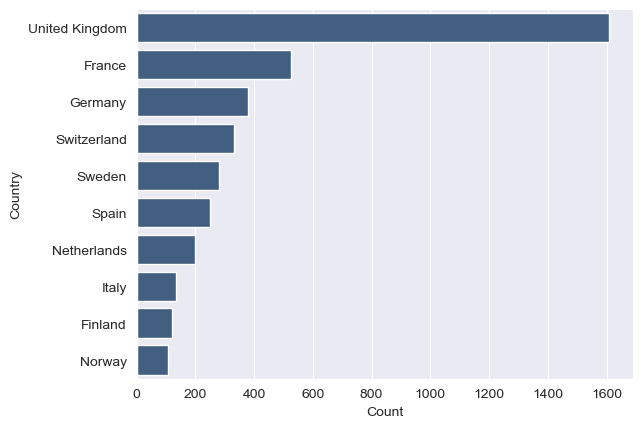

In [27]:
countplot = sns.countplot(data=df, y='Country', order=df.Country.value_counts().iloc[:10].index, color='#385E8B')
countplot.set(xlabel='Count')
fig = countplot.get_figure()
fig.savefig("countries_top10.png", dpi = 800, bbox_inches='tight')

Countries (Last 10)

<AxesSubplot: xlabel='count', ylabel='Country'>

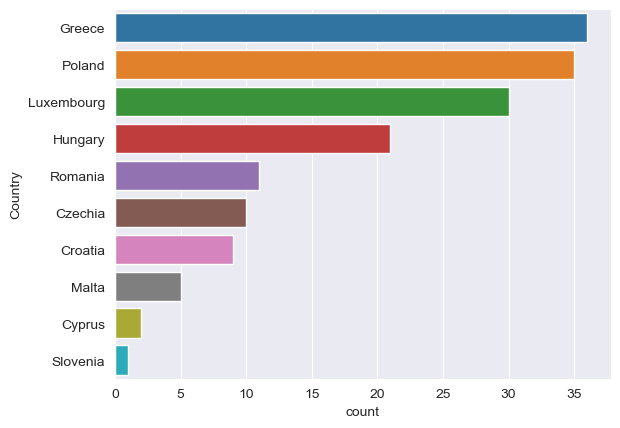

In [28]:
sns.countplot(data=df, y='Country', order=df.Country.value_counts().iloc[-10:].index)

 Years

In [29]:
df.value_counts('Year')

Year
2018    544
2016    527
2017    517
2019    511
2015    474
2014    467
2013    430
2012    381
2011    343
2010    338
dtype: int64

In [30]:
sns.set_style('white')
sns.set_palette('colorblind')

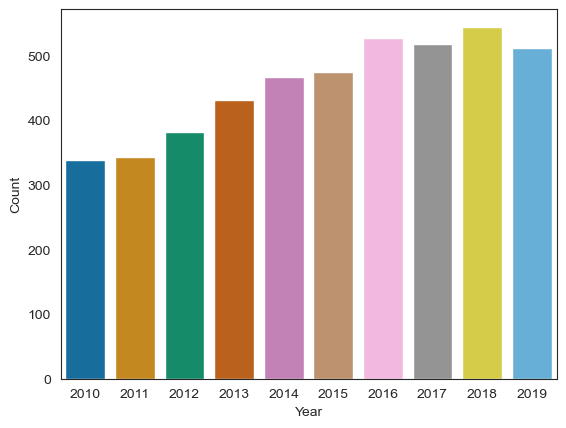

In [31]:
countplot = sns.countplot(data=df, x='Year')
countplot.set(ylabel='Count')
fig = countplot.get_figure()
fig.savefig("countplot_year.png", dpi = 800, bbox_inches='tight')

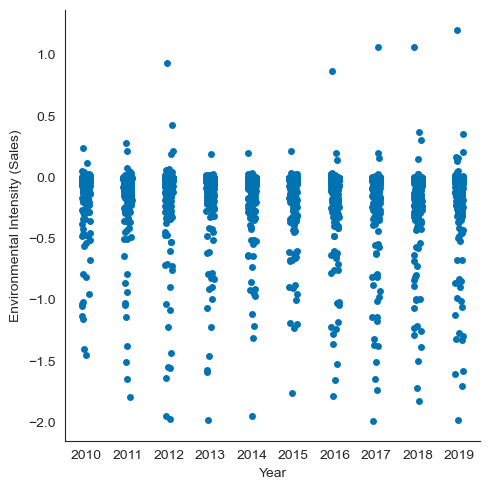

In [32]:
catplot = sns.catplot(data=df, x="Year", y="Environmental Intensity (Sales)", kind="strip")
catplot.savefig("catplot_year.png", dpi = 800, bbox_inches='tight')

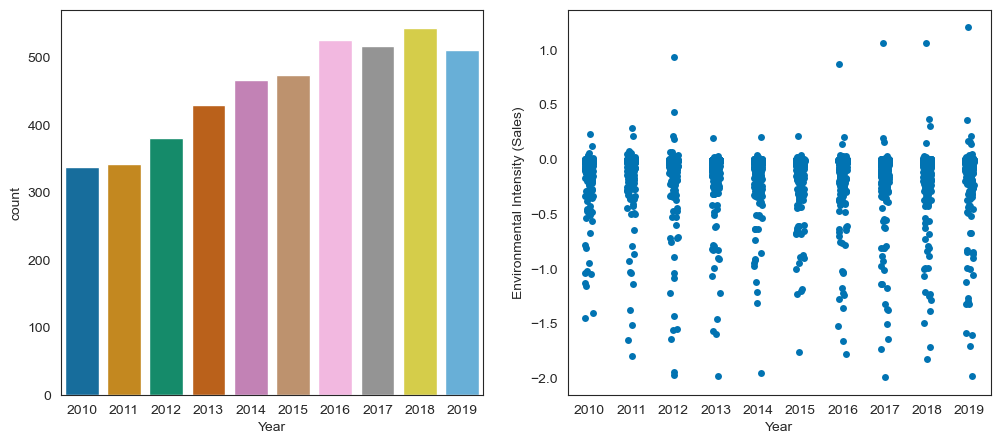

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

#create boxplot in each subplot
sns.countplot(data=df, x='Year', ax=axes[0])
sns.stripplot(data=df, x="Year", y="Environmental Intensity (Sales)", ax=axes[1])
fig.savefig("year.png", dpi = 800, bbox_inches='tight')

Industries (Top 10)

<AxesSubplot: xlabel='count', ylabel='Industry (Exiobase)'>

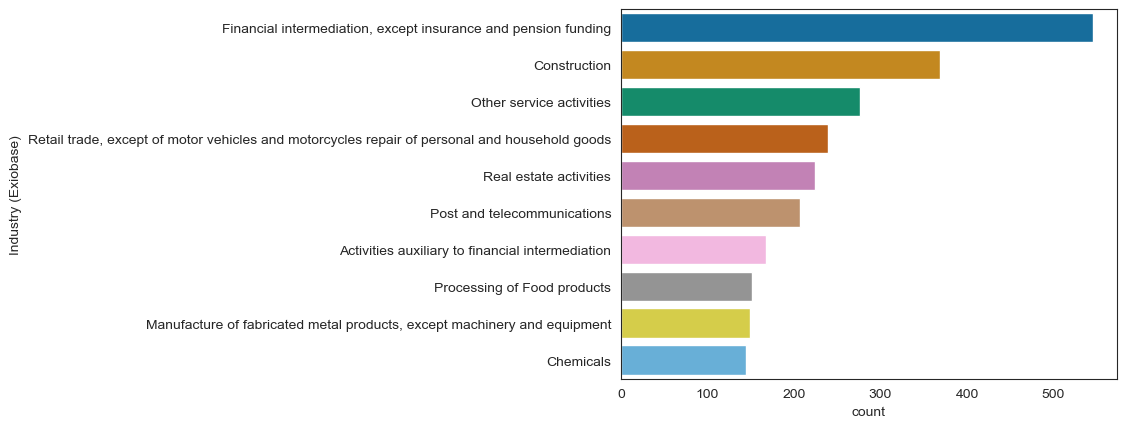

In [34]:
sns.countplot(data=df, y='Industry (Exiobase)', order=df['Industry (Exiobase)'].value_counts().iloc[:10].index)

Industries (Last 10)

<AxesSubplot: xlabel='count', ylabel='Industry (Exiobase)'>

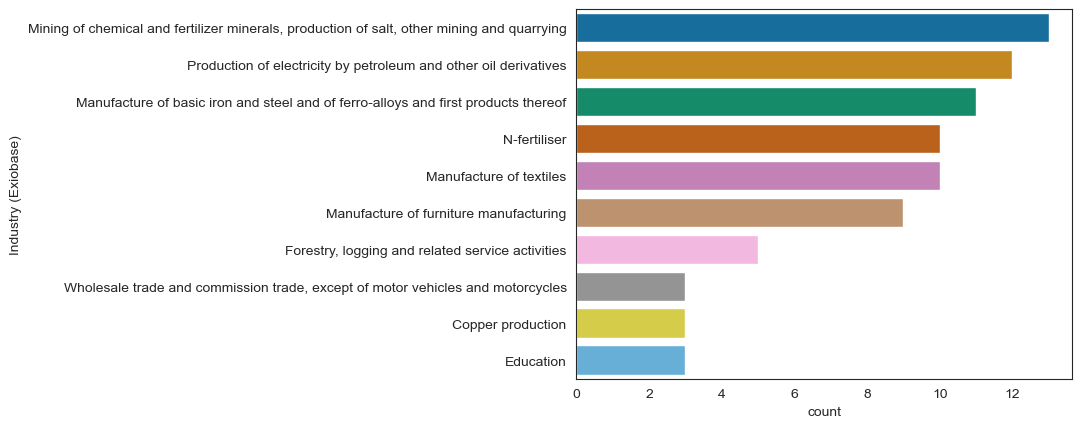

In [35]:
sns.countplot(data=df, y='Industry (Exiobase)', order=df['Industry (Exiobase)'].value_counts().iloc[-10:].index)

Macro Industries

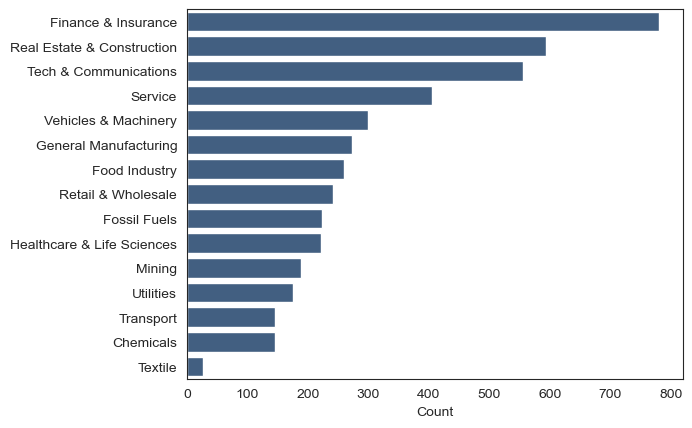

In [36]:
countplot = sns.countplot(data=df, y='Macro Industry',
                          order=df['Macro Industry'].value_counts().index, color='#385E8B')

countplot.set(xlabel='Count', ylabel='')
fig = countplot.get_figure()
fig.savefig("countplot_industry.png", dpi = 800, bbox_inches='tight')

Correlation Matrix:

/var/folders/dl/_lzcrqln1vs138qzck4b83lw0000gn/T/ipykernel_20329/3222226835.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()


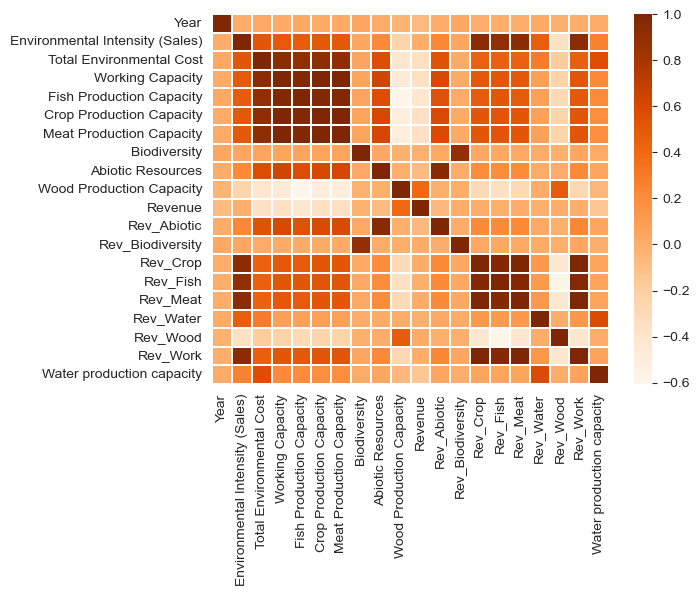

In [37]:
df1 = df.copy()

df1.groupby("Company Name").count()["Year"][df1.groupby("Company Name").count()["Year"] == 20]

df1['Water production capacity'] = df1['Water production capacity (Drinking water & Irrigation Water)']
df1.drop('Water production capacity (Drinking water & Irrigation Water)', axis=1, inplace=True)

corr = df1.corr()
cmap = 'Oranges'

sns.heatmap(corr, mask=None, cmap=cmap, linewidth=.2)
plt.savefig("corr.png", dpi = 800, bbox_inches='tight')

## Scraping ESG scores
ESG data are scraped from [finance.yahoo.com](https://finance.yahoo.com) using the yahooquery library

In [38]:
def search_symbol(query, verbose=False):
    # query yahoo finance
    try:
        data = yq.search(query)
    except ValueError:
        return None
    else:
        quotes = data['quotes']
        if len(quotes) == 0:
            if verbose:
                print(query, '-', 'no symbol found')
            return ''

        symbol = quotes[0]['symbol']
        if verbose:
            print(query, "-", symbol)
        return symbol


def get_symbols(companies, verbose=False):
    s = []
    for company in companies:
        symbol = search_symbol(company, verbose=verbose)
        while symbol is None:  # wait to avoid API limits
            time.sleep(10)
            if verbose:
                print('waiting...')
            symbol = search_symbol(company)
        s.append(symbol)
    return s


def get_data(fin, verbose=False):
    df = fin.copy()
    for symbol in df.index:
        # skip companies w/out a symbol
        # (the ones like @nameofcompany) -> data not available on yahoofinance
        if str(symbol)[0] == '@':
            continue

        ticker = yq.Ticker(symbol)

        # esg scores
        esg = ticker.esg_scores[symbol]

        # check if esg data is available or not
        if not isinstance(esg, str):
            df.at[symbol, 'TotalEsgScore'] = esg['totalEsg']
            df.at[symbol, 'EnvironmentRiskScore'] = esg['environmentScore']
            df.at[symbol, 'SocialRiskScore'] = esg['socialScore']
            df.at[symbol, 'GovernanceRiskScore'] = esg['governanceScore']
            df.at[symbol, 'EsgRatingYear'] = int(esg['ratingYear'])

        if verbose:
            print('getting data for', symbol)
    return df

To scrape the data for all the companies a runtime of around 10 minutes is expected. To make running the notebook easier the next section is commented by default and a pre-downloaded dataset is loaded instead.

In [39]:
# # read data and extract list of companies (unique)
# unique_companies = list(df['Company Name'].unique())
#
# # initialize df with names of companies
# esg = pd.DataFrame({'Company Name': unique_companies})
#
# # add symbols
# symbols = get_symbols(unique_companies, verbose=True)
# s = []
# for symbol, name in zip(symbols, unique_companies):
#     # check if symbol is available
#     # if it is not then uses '@' + 'nameofcompany' instead
#     # if it is uses symbol
#     if symbol == '':
#         s.append('@' + name)
#     else:
#         s.append(symbol)
# esg['CompanySymbol'] = s
#
# # set symbols as index of df
# esg.set_index('CompanySymbol', inplace=True)
#
# # get esg data from yahoofinance
# esg = get_data(esg, verbose=True)
#
# # saves data as csv
# esg.to_csv('../data/esg.csv')

In [40]:
# esg = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Visual Analytics - Final Project/data/esg.csv')
esg = pd.read_csv('../data/esg.csv')

## Joining Data Sets and Exporting

The data scraped above is merged to the data set

In [41]:
joined = df.merge(esg, on='Company Name', how='left')

In [42]:
joined.head(3)

,Year,Company Name,Country,Industry (Exiobase),Environmental Intensity (Sales),Total Environmental Cost,Working Capacity,Fish Production Capacity,Crop Production Capacity,Meat Production Capacity,...,Rev_Meat,Rev_Water,Rev_Wood,Rev_Work,CompanySymbol,TotalEsgScore,EnvironmentRiskScore,SocialRiskScore,GovernanceRiskScore,EsgRatingYear
0,2019,SAGA PLC,United Kingdom,Activities auxiliary to financial intermediation,-0.028872,-3.184231e+07,-3.115075e+07,-7184.203318,-414256.439748,-97118.316229,...,-0.000088,-0.000155,1.281502e-07,-0.028245,SAGA.L,NaN,NaN,NaN,NaN,NaN
1,2019,INTERTEK GROUP PLC,United Kingdom,Activities auxiliary to financial intermediation,-0.015297,-6.059927e+07,-5.928166e+07,-13774.014902,-788289.414697,-184801.582555,...,-0.000047,-0.000082,1.281502e-07,-0.014964,ITRK.L,21.18,0.07,14.59,6.52,2022.0
2,2019,BUREAU VERITAS SA,France,Activities auxiliary to financial intermediation,-0.006993,-3.997865e+07,-3.910761e+07,-9330.459280,-520701.497769,-121952.573721,...,-0.000021,-0.000038,2.050071e-07,-0.006840,BVI.PA,11.29,0.07,6.43,4.79,2022.0


As some of the columns are not needed anymore they are dropped

In [43]:
joined.columns

Index(['Year', 'Company Name', 'Country', 'Industry (Exiobase)',
       'Environmental Intensity (Sales)', 'Total Environmental Cost',
       'Working Capacity', 'Fish Production Capacity',
       'Crop Production Capacity', 'Meat Production Capacity', 'Biodiversity',
       'Abiotic Resources',
       'Water production capacity (Drinking water & Irrigation Water)',
       'Wood Production Capacity', 'Macro Industry', 'Revenue', 'Rev_Abiotic',
       'Rev_Biodiversity', 'Rev_Crop', 'Rev_Fish', 'Rev_Meat', 'Rev_Water',
       'Rev_Wood', 'Rev_Work', 'CompanySymbol', 'TotalEsgScore',
       'EnvironmentRiskScore', 'SocialRiskScore', 'GovernanceRiskScore',
       'EsgRatingYear'],
      dtype='object')

In [44]:
columns_to_drop = ['CompanySymbol', 'TotalEsgScore', 'SocialRiskScore', 'GovernanceRiskScore', 'EsgRatingYear']
joined.drop(columns=columns_to_drop, axis=1, inplace=True)

Finally, the data set is exported

In [45]:
# joined.to_excel('/content/drive/MyDrive/Colab Notebooks/Visual Analytics - Final Project/data/environmental_data.xlsx', header=True)
joined.to_excel('../data/environmental_data.xlsx', header=True)

In [46]:
joined.head(3)

,Year,Company Name,Country,Industry (Exiobase),Environmental Intensity (Sales),Total Environmental Cost,Working Capacity,Fish Production Capacity,Crop Production Capacity,Meat Production Capacity,...,Revenue,Rev_Abiotic,Rev_Biodiversity,Rev_Crop,Rev_Fish,Rev_Meat,Rev_Water,Rev_Wood,Rev_Work,EnvironmentRiskScore
0,2019,SAGA PLC,United Kingdom,Activities auxiliary to financial intermediation,-0.028872,-3.184231e+07,-3.115075e+07,-7184.203318,-414256.439748,-97118.316229,...,1.102887e+09,-9.602458e-07,-1.180607e-06,-0.000376,-0.000007,-0.000088,-0.000155,1.281502e-07,-0.028245,NaN
1,2019,INTERTEK GROUP PLC,United Kingdom,Activities auxiliary to financial intermediation,-0.015297,-6.059927e+07,-5.928166e+07,-13774.014902,-788289.414697,-184801.582555,...,3.961539e+09,-9.602458e-07,-6.278595e-07,-0.000199,-0.000003,-0.000047,-0.000082,1.281502e-07,-0.014964,0.07
2,2019,BUREAU VERITAS SA,France,Activities auxiliary to financial intermediation,-0.006993,-3.997865e+07,-3.910761e+07,-9330.459280,-520701.497769,-121952.573721,...,5.717172e+09,-7.199903e-07,-2.923273e-07,-0.000091,-0.000002,-0.000021,-0.000038,2.050071e-07,-0.006840,0.07
